In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ete3 import Tree

# Code for preparing data for experiments

We show how the downsampling of the original data is carried out. 
Landmark data is publicly available at https://datadryad.org/dataset/doi:10.5061/dryad.2jm63xsq6. 

### 1. Create hercules_forewing_n=20.csv

Show how we create the hercules_forewing_n=20.csv file used for rank test, root evaluation and simulation study.

In [3]:
wing = 'forewing'
rootfile = f'data/Morpho_{wing}_procCoor.txt' 
rootdata =  pd.read_csv(rootfile, sep="\t", index_col=False)
np.where(rootdata.species=='hercules')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),)

In [4]:
# pick one wing arbitrarily 
selected = rootdata.iloc[0,:]
selected.loc['ProcCoord1'::] = selected.loc['ProcCoord1'::]*5
species = selected.species
print(species)
root = np.array(selected.iloc[8::])

hercules


/var/folders/ry/51znrq2s2px_52ndfy4k3kw00000gn/T/ipykernel_26707/1635261386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected.loc['ProcCoord1'::] = selected.loc['ProcCoord1'::]*5


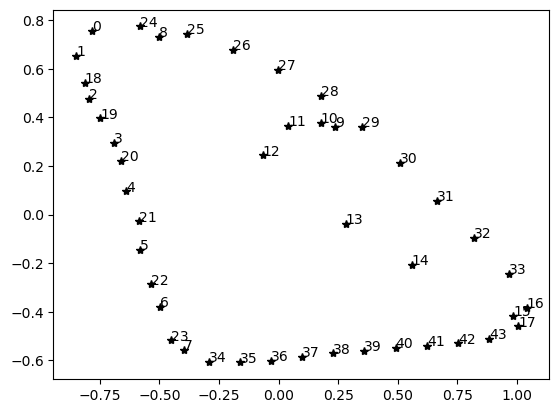

In [5]:
plt.plot(root[::2], root[1::2], '*', color='black')
n = list(range(len(root[::2])))
for i, txt in enumerate(n):
    plt.annotate(txt, (root[::2][i], root[1::2][i]))

In [6]:
landmark_sele = [0, 1, 19, 20, 21, 22, 23, 34, 36, 38, 40, 42, 17, 16, 33, 31, 29, 27, 25, 24]
xcoord = root[::2]
ycoord = root[1::2]

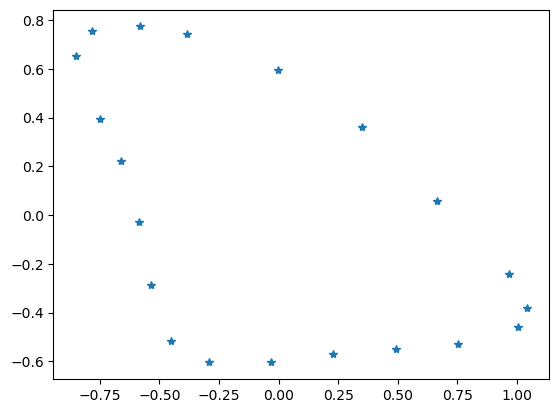

In [28]:
plt.plot(xcoord[landmark_sele], ycoord[landmark_sele], '*')

In [8]:
xcoord_sele = xcoord[landmark_sele]
ycoord_sele = ycoord[landmark_sele]
final_selected = np.array(list(zip(xcoord_sele, ycoord_sele))).flatten()

In [9]:
#np.savetxt(f"data/{selected.species}_{wing}_n={len(xcoord_sele)}.csv", final_selected, delimiter=",")

### 2. Create forewing_data_male.csv
Show how we create the data file "forewing_data_male.csv" used in Section 4.4.

In [10]:
treefile = 'data/chazot_full_tree.nw' # read in phylogeny from chazot
wing = 'forewing'
file = f'data/Morpho_{wing}_procCoor.txt' # read in all landmark data from chazot

In [11]:
data =  pd.read_csv(file, sep="\t", index_col=False)
with open(treefile, 'r') as file: 
        newick_tree = file.read()
bphylogeny = Tree(newick_tree)

In [12]:
print(bphylogeny)


      /-eugenia
   /-|
  |   \-marcus
  |
  |         /-anaxibia
  |      /-|
  |     |  |   /-cypris
  |     |   \-|
  |     |      \-rhetenor
  |   /-|
--|  |  |      /-cisseis
  |  |  |   /-|
  |  |  |  |   \-hecuba
  |  |  |  |
  |  |   \-|      /-niepelti
  |  |     |   /-|
  |  |     |  |   \-theseus
  |  |      \-|
  |  |        |   /-hercules
   \-|         \-|
     |           |   /-amphitryon
     |            \-|
     |               \-telemachus
     |
     |   /-polyphemus
     |  |
     |  |         /-granadensis
     |  |      /-|
     |  |     |  |   /-achilles
     |  |     |   \-|
      \-|   /-|      \-helenor
        |  |  |
        |  |  |   /-deidamia
        |  |   \-|
        |  |     |   /-epistrophus
        |  |      \-|
        |  |         \-iphitus
         \-|
           |      /-amathonte
           |   /-|
           |  |  |   /-godartii
           |  |   \-|
           |  |      \-menelaus
           |  |
            \-|      /-zephyritis
            

In [13]:
# get all the species names in the right order 
leaves_string = []
for leaf in bphylogeny: 
    leaves_string.append(leaf.name)

In [14]:
leaves_data=[]
landmark_sele =[0, 1, 19, 20, 21, 22, 23, 34, 36, 38, 40, 42, 17, 16, 33, 31, 29, 27, 25, 24]
male_data = data.loc[data['sex']=='M']

In [15]:
 # select only male butterflies
for leaf in leaves_string:
    indices = np.where(male_data.species==leaf)
    cur_specimen = male_data.iloc[indices[0],:]
    cur_leaf = np.mean(np.array(cur_specimen.iloc[:,8::]), axis=0) 
    leaves_data.append(np.array(list(zip(cur_leaf[::2][landmark_sele], cur_leaf[1::2][landmark_sele]))).flatten())

In [16]:
forewings = pd.DataFrame(np.array(leaves_data).T, columns=leaves_string)
pd.DataFrame.to_csv(forewings, 'data/forewing_data_male.csv', index=False)

Visualize downsampled data

In [17]:
forewing = np.array(pd.read_csv('data/forewing_data_male.csv', delimiter=','))

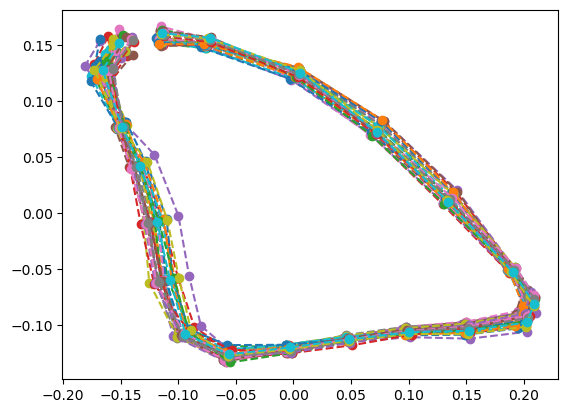

In [18]:
for i in range(forewing.shape[1]):
    wing = forewing[:,i]
    plt.plot(wing[::2], wing[1::2], '--o')

### 3. Create subtree or mixed phylogeny

We use a subtree from the published phylogeny from Chazot for rank test and root estimation evaluation. We obtain the subtree from the full phylogeny using the code below.

In [19]:
treefile = 'data/chazot_full_tree.nw' # read in phylogeny from chazot
with open(treefile, 'r') as file: 
        newick_tree = file.read()
bphylogeny = Tree(newick_tree)

In [21]:
print(bphylogeny)


      /-eugenia
   /-|
  |   \-marcus
  |
  |         /-anaxibia
  |      /-|
  |     |  |   /-cypris
  |     |   \-|
  |     |      \-rhetenor
  |   /-|
--|  |  |      /-cisseis
  |  |  |   /-|
  |  |  |  |   \-hecuba
  |  |  |  |
  |  |   \-|      /-niepelti
  |  |     |   /-|
  |  |     |  |   \-theseus
  |  |      \-|
  |  |        |   /-hercules
   \-|         \-|
     |           |   /-amphitryon
     |            \-|
     |               \-telemachus
     |
     |   /-polyphemus
     |  |
     |  |         /-granadensis
     |  |      /-|
     |  |     |  |   /-achilles
     |  |     |   \-|
      \-|   /-|      \-helenor
        |  |  |
        |  |  |   /-deidamia
        |  |   \-|
        |  |     |   /-epistrophus
        |  |      \-|
        |  |         \-iphitus
         \-|
           |      /-amathonte
           |   /-|
           |  |  |   /-godartii
           |  |   \-|
           |  |      \-menelaus
           |  |
            \-|      /-zephyritis
            

In [26]:
subtree = bphylogeny.children[1].children[0].children[1].children[1]
print(subtree)


      /-niepelti
   /-|
  |   \-theseus
--|
  |   /-hercules
   \-|
     |   /-amphitryon
      \-|
         \-telemachus


In [ ]:
#subtree.write(format=1, outfile='data/chazot_subtree.nw')